In [ ]:
import numpy as np
import pandas as pd

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

In [ ]:
volunteer = pd.read_csv('/content/leaf_dataset.csv')
volunteer.head(6)

,Class(species),specimen number,Eccentricity,Aspect Ratio,Elongation,Solidity,Stochastic Convexity,Isoperimetric Factor,Maximal Indentation Depth,Lobedness,Average Intensity,Average Contrast,Smoothness,Third moment,Uniformity,Entropy
0,1,1,0.72694,1.4742,0.32396,0.98535,1.00000,0.83592,0.004657,0.003947,0.047790,0.127950,0.016108,0.005232,0.000275,1.17560
1,1,2,0.74173,1.5257,0.36116,0.98152,0.99825,0.79867,0.005242,0.005002,0.024160,0.090476,0.008119,0.002708,0.000075,0.69659
2,1,3,0.76722,1.5725,0.38998,0.97755,1.00000,0.80812,0.007457,0.010121,0.011897,0.057445,0.003289,0.000921,0.000038,0.44348
3,1,4,0.73797,1.4597,0.35376,0.97566,1.00000,0.81697,0.006877,0.008607,0.015950,0.065491,0.004271,0.001154,0.000066,0.58785
4,1,5,0.82301,1.7707,0.44462,0.97698,1.00000,0.75493,0.007428,0.010042,0.007938,0.045339,0.002051,0.000560,0.000023,0.34214
5,1,6,0.72997,1.4892,0.34284,0.98755,1.00000,0.84482,0.004945,0.004451,0.010487,0.058528,0.003414,0.001125,0.000025,0.34068


In [ ]:
volunteer.isnull().sum()

volunteer[['Elongation', 'Maximal Indentation Depth', 'Lobedness', 'Average Contrast', 'Entropy']]

,Elongation,Maximal Indentation Depth,Lobedness,Average Contrast,Entropy
0,0.32396,0.004657,0.003947,0.127950,1.17560
1,0.36116,0.005242,0.005002,0.090476,0.69659
2,0.38998,0.007457,0.010121,0.057445,0.44348
3,0.35376,0.006877,0.008607,0.065491,0.58785
4,0.44462,0.007428,0.010042,0.045339,0.34214
...,...,...,...,...,...
335,0.81725,0.091860,1.535800,0.208610,2.02810
336,0.75319,0.078996,1.135800,0.218300,2.40590
337,0.78147,0.089763,1.466400,0.207030,1.69350
338,0.71532,0.113370,2.339400,0.135850,1.15260


In [ ]:
impute = SimpleImputer(missing_values = np.nan, strategy = 'mean')

impute.fit(volunteer[['Elongation']])
volunteer['Elongation'] = impute.transform(volunteer[['Elongation']])


impute.fit(volunteer[['Maximal Indentation Depth']])
volunteer['Maximal Indentation Depth'] = impute.transform(volunteer[['Maximal Indentation Depth']])


impute.fit(volunteer[['Lobedness']])
volunteer['Lobedness'] = impute.transform(volunteer[['Lobedness']])


impute.fit(volunteer[['Average Contrast']])
volunteer['Average Contrast'] = impute.transform(volunteer[['Average Contrast']])

volunteer.isnull().sum()

volunteer['Class(species)'].unique()

label = volunteer['Class(species)']
feature = volunteer.drop('Class(species)', axis=1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(feature, label, test_size = 0.2, random_state = 1)

scalar = MinMaxScaler()
scalar.fit(x_train)
x_train_scaled = scalar.transform(x_train)

scalar.fit(x_test)
x_test_scaled = scalar.transform(x_test)

In [ ]:
#SVC

svc = SVC(kernel = "linear")
svc.fit(x_train_scaled, y_train)
SVC_acc = svc.score(x_test_scaled, y_test)*100
SVC_acc

36.76470588235294

In [ ]:
#NN

nn = MLPClassifier(activation = "relu", hidden_layer_sizes = (7), max_iter = 10000)
nn.fit(x_train_scaled, y_train)
NN_acc = nn.score(x_test_scaled, y_test)*100
NN_acc

44.11764705882353

In [ ]:
#RF

rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(x_train_scaled, y_train)
RF_acc = rfc.score(x_test_scaled, y_test)*100
RF_acc

60.29411764705882

In [ ]:
#PCA

pca = PCA(n_components = 7)

pca.fit(x_train_scaled)
x_train_scaled_pca = pca.transform(x_train_scaled)
x_test_scaled_pca = pca.transform(x_test_scaled) 

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel = "linear")
svc.fit(x_train_scaled_pca, y_train)
SVC_acc_PCA = svc.score(x_test_scaled_pca, y_test)*100
SVC_acc_PCA

32.35294117647059

In [ ]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(activation = "relu", hidden_layer_sizes = (7), max_iter = 10000)
nn.fit(x_train_scaled_pca, y_train)
NN_acc_PCA = nn.score(x_test_scaled_pca, y_test)*100
NN_acc_PCA

50.0

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 50)
rfc.fit(x_train_scaled_pca, y_train)

RFC_acc_PCA = rfc.score(x_test_scaled_pca, y_test)*100
RFC_acc_PCA

45.588235294117645

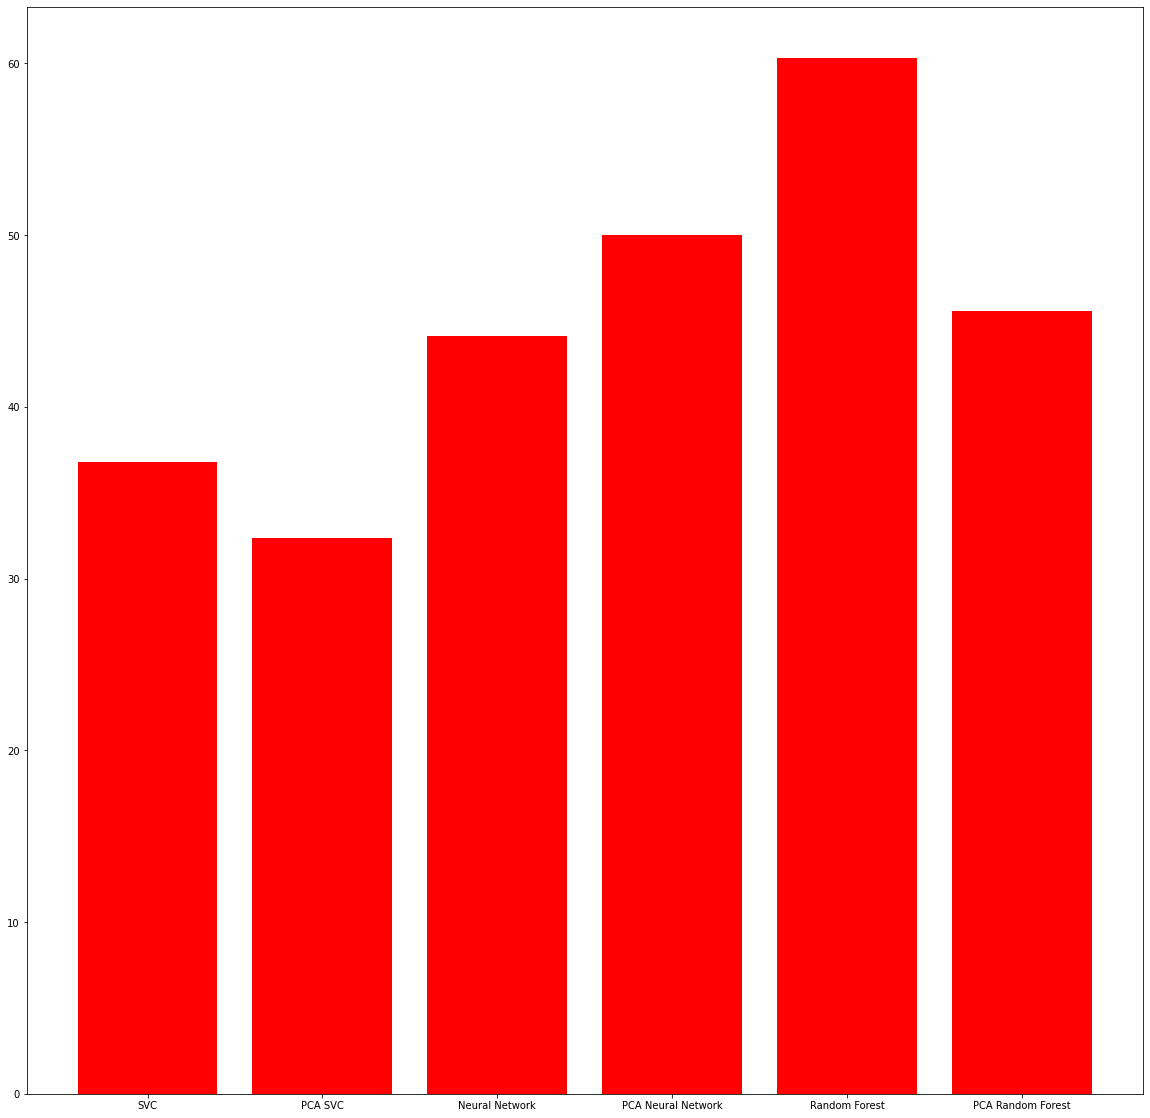

In [ ]:
# before PCA VS after PCA
plt.figure(figsize = (20, 20))
xAxis = ['SVC', 'PCA SVC', 'Neural Network', 'PCA Neural Network', 'Random Forest', 'PCA Random Forest']
yAxis = [SVC_acc, SVC_acc_PCA, NN_acc, NN_acc_PCA, RF_acc, RFC_acc_PCA]
plt.bar(xAxis, yAxis, color="r")
plt.show()